# Seaborn Intro

In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import ast

# load dataset
df = pd.read_csv('C:/Users/HP/Desktop/Python_Data_Project/datasets/data_jobs.csv')

# data cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

## import and install seaborn

In [98]:
import seaborn as sns

In [99]:
df_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country']== 'United States')].copy()
df_US = df_US.dropna(subset='salary_year_avg')
df_US_exploded = df_US.explode('job_skills')
df_US_group = df_US_exploded.groupby('job_skills')['salary_year_avg'].agg(['count', 'median'])

#top 10 paying skills
df_US_group_median = df_US_group.sort_values(by='median', ascending=False).head(10)

# top 10 in-demand skills
df_US_group_count = df_US_group.sort_values(by='count', ascending=False).head(10)
df_US_group_count

,count,median
job_skills,,
sql,2508,91000.00
excel,1808,84392.00
python,1431,97500.00
tableau,1364,92875.00
sas,926,90000.00
r,893,92500.00
power bi,838,90000.00
powerpoint,462,85000.00
word,461,81194.75


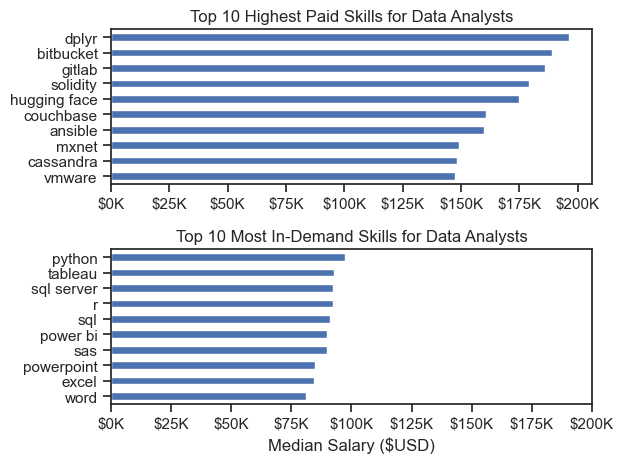

In [100]:
import matplotlib.ticker as ticker

fig, ax = plt.subplots(2, 1)

# format x-axis 
formatter = ticker.FuncFormatter(lambda x, pos: f'${int(x/1000)}K')

df_US_group_median[::-1].plot(kind='barh', y='median', legend=False, ax=ax[0])
ax[0].xaxis.set_major_formatter(formatter)
ax[0].set_title('Top 10 Highest Paid Skills for Data Analysts')
ax[0].set_ylabel('')


df_US_group_count_sort = df_US_group_count.sort_values(by='median', ascending=True)
df_US_group_count_sort.plot(kind='barh', y='median', legend=False, ax=ax[1])
ax[1].xaxis.set_major_formatter(formatter)
ax[1].set_xlim(0, 200000)
ax[1].set_title('Top 10 Most In-Demand Skills for Data Analysts')
ax[1].set_xlabel('Median Salary ($USD)')
ax[1].set_ylabel('')

fig.tight_layout()

# customize using seaborn library

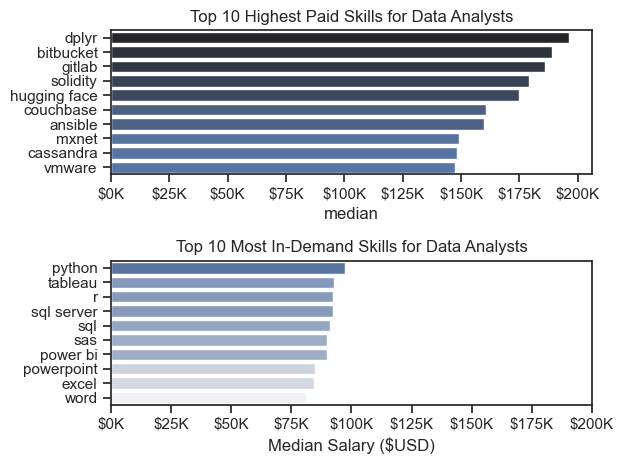

In [101]:
import matplotlib.ticker as ticker
import seaborn as sns

fig, ax = plt.subplots(2, 1)
sns.set_theme(style='ticks')

# format x-axis 
formatter = ticker.FuncFormatter(lambda x, pos: f'${int(x/1000)}K')

# df_US_group_median[::-1].plot(kind='barh', y='median', legend=False, ax=ax[0])
sns.barplot(data=df_US_group_median, x='median', y=df_US_group_median.index, ax=ax[0], hue='median', palette='dark:b_r')
ax[0].legend().remove()
ax[0].xaxis.set_major_formatter(formatter)
ax[0].set_title('Top 10 Highest Paid Skills for Data Analysts')
ax[0].set_ylabel('')


df_US_group_count_sort = df_US_group_count.sort_values(by='median', ascending=False)
# df_US_group_count_sort.plot(kind='barh', y='median', legend=False, ax=ax[1])
sns.barplot(data=df_US_group_count_sort, x='median', y=df_US_group_count_sort.index, ax=ax[1], hue='median', palette='light:b')
ax[1].legend().remove()
ax[1].xaxis.set_major_formatter(formatter)
ax[1].set_xlim(0, 200000)
ax[1].set_title('Top 10 Most In-Demand Skills for Data Analysts')
ax[1].set_xlabel('Median Salary ($USD)')
ax[1].set_ylabel('')

fig.tight_layout()

# Customize Histogram

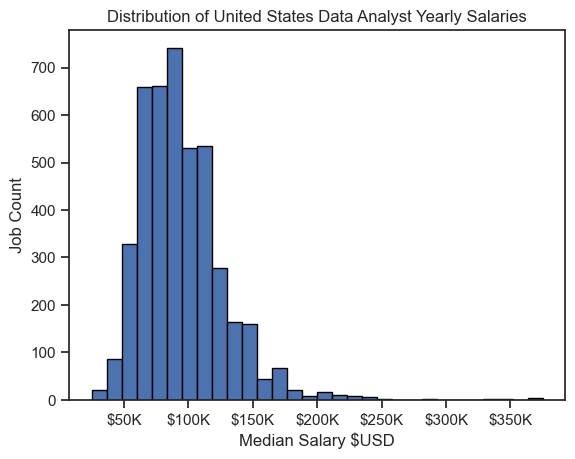

In [102]:
df_US_hist = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()
df_US_hist['salary_year_avg'].plot(kind='hist', bins=30, edgecolor='black')

# add labels
plt.title('Distribution of United States Data Analyst Yearly Salaries')
plt.ylabel('Job Count')
plt.xlabel('Median Salary $USD')
ax=plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))

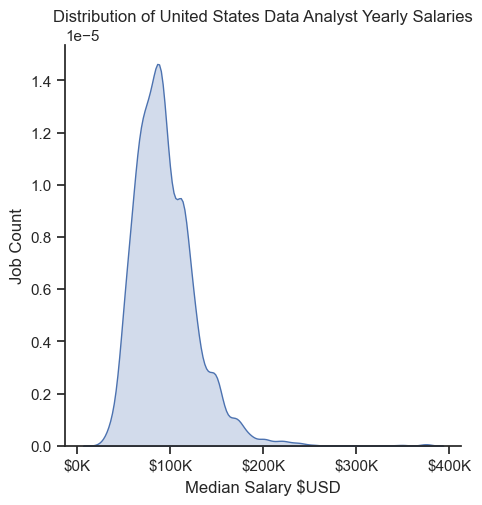

In [103]:
import seaborn as sns

df_US_hist = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

# df_US_hist['salary_year_avg'].plot(kind='hist', bins=30, edgecolor='black')
sns.displot(df_US_hist['salary_year_avg'], kind='kde', fill=True)

# add labels
plt.title('Distribution of United States Data Analyst Yearly Salaries')
plt.ylabel('Job Count')
plt.xlabel('Median Salary $USD')
ax=plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))

### BoxPlot 

In [108]:
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']
job_list = [df_US_BP[df_US_BP['job_title_short'] == job_title]['salary_year_avg'] for job_title in job_titles]


In [107]:
df_US_BP = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'] == 'United States')].copy()
df_US_BP = df_US_BP.dropna(subset='salary_year_avg')

C:\Users\HP\AppData\Local\Temp\ipykernel_5328\1248838426.py:1: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(job_list, labels=job_titles, vert=False)


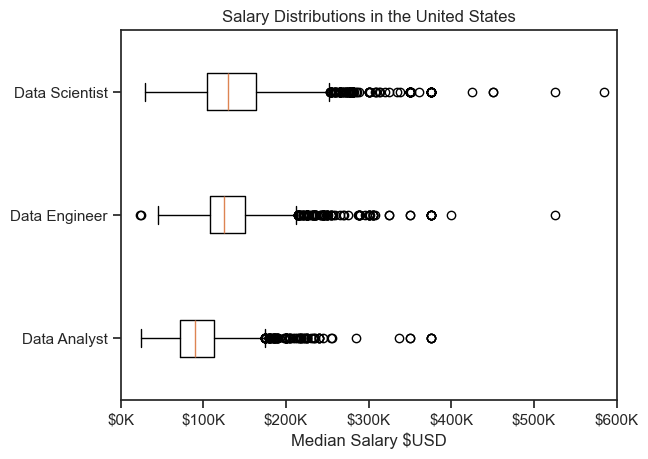

In [115]:
plt.boxplot(job_list, labels=job_titles, vert=False)
plt.xlim(0, 600000)
plt.title('Salary Distributions in the United States')
plt.xlabel('Median Salary $USD')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
plt.show()

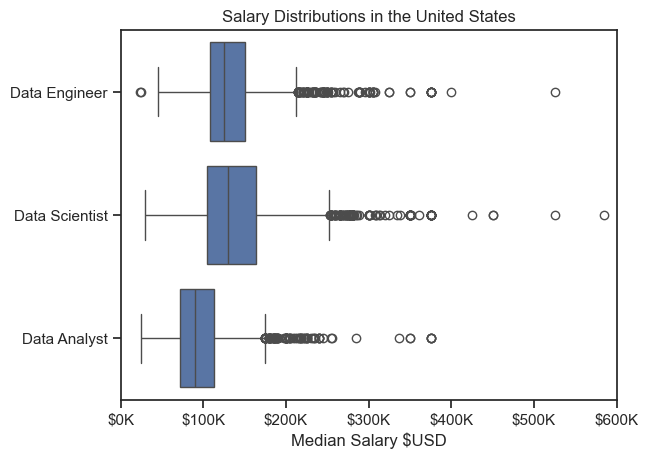

In [117]:
import seaborn as sns

# plt.boxplot(job_list, labels=job_titles, vert=False)
sns.boxplot(data=df_US_BP, x='salary_year_avg', y='job_title_short')
plt.xlim(0, 600000)
plt.title('Salary Distributions in the United States')
plt.xlabel('Median Salary $USD')
plt.ylabel('')

ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
plt.show()